# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_meta_study_data = pd.merge(study_results, mouse_metadata, on = 'Mouse ID', how = 'left' )

# Display the data table for preview
merged_meta_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_of_mice = merged_meta_study_data["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ids = merged_meta_study_data[merged_meta_study_data.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
total_duplicate_mouse_data = merged_meta_study_data[merged_meta_study_data['Mouse ID'].isin(duplicate_mice_ids)]
total_duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_meta_study_data[~merged_meta_study_data['Mouse ID'].isin(duplicate_mice_ids)]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_cleaned_data = cleaned_data["Mouse ID"].nunique()
number_of_mice_cleaned_data

248

## Summary Statistics

In [7]:
#A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen (only one method is required in the solution)
#Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_tumors_column = merged_meta_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
#Renaming columns to names listed above
summary_statistics_tumors_column = summary_statistics_tumors_column.rename(columns={
                                'mean': 'Mean Tumor Volume',
                                'median': 'Median Tumor Volume',
                                'var': 'Tumor Volume Variance',
                                'std': 'Tumor Volume Std. Dev.',
                                'sem': 'Tumor Volume Std. Err.'})
#printing output
summary_statistics_tumors_column

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

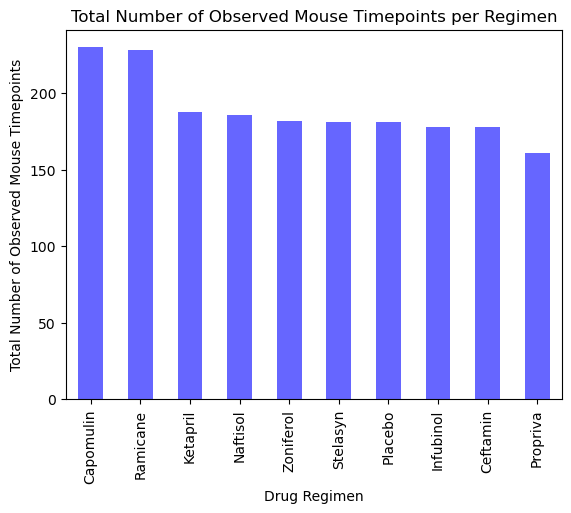

In [8]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = merged_meta_study_data['Drug Regimen'].value_counts()

#Create a bar plot using Pandas plot function
regimen_counts.plot(kind='bar', color='blue', alpha=0.6)

#Set labels and title
plt.title('Total Number of Observed Mouse Timepoints per Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Observed Mouse Timepoints')

#Show the plot
plt.show()

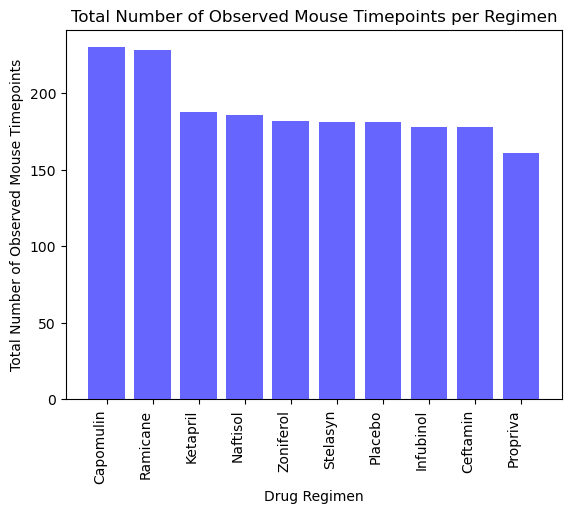

In [9]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#define parameters for plt.bar function of matplotlib
recorded_observations = merged_meta_study_data['Drug Regimen'].value_counts()
drug_regimens = recorded_observations.index
number_of_observations = recorded_observations

#Generate plt.bar function to create a bar graph
plt.bar(drug_regimens, number_of_observations, color='blue', alpha=0.6)

#Set labels and title
plt.title('Total Number of Observed Mouse Timepoints per Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Observed Mouse Timepoints')

#Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=90, ha='right')

#Show the plot
plt.show()


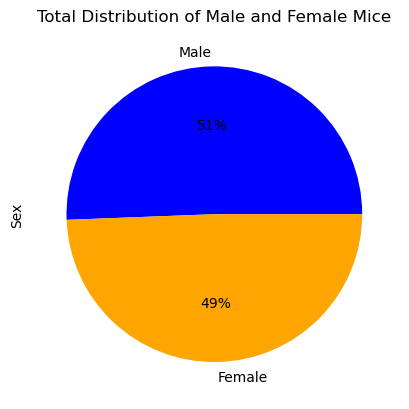

In [10]:
#Generate a pie plot showing the distribution of female versus male mice using Pandas
#define a variable we can graph by taking count of observations in that category
gender_distribution = merged_meta_study_data['Sex'].value_counts()
#set parameters in pie chart
gender_distribution.plot(kind='pie', autopct='%1.0f%%', colors=['blue','orange'], startangle=0)
#title diplay
plt.title('Total Distribution of Male and Female Mice')
#display output
plt.show()

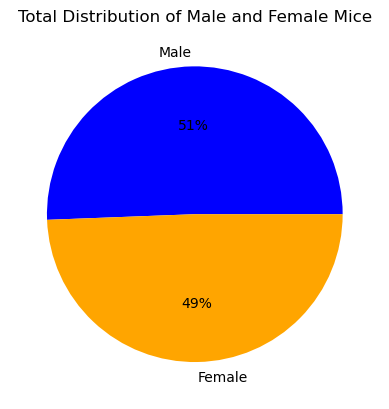

In [11]:
#Generate a pie plot showing the distribution of female versus male mice using pyplot
#define a variable we can graph by taking count of observations in that category
gender_distribution = merged_meta_study_data['Sex'].value_counts()
#set parameters for matplotlib pie function
plt.pie(gender_distribution, labels = gender_distribution.index, autopct='%1.0f%%', colors=['blue', 'orange'], startangle = 0)
#title display
plt.title('Total Distribution of Male and Female Mice')
#display output
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin
#filtering through meta study data to specify drug regimens of interest listed above
select_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
select_data_by_regimens = merged_meta_study_data[merged_meta_study_data['Drug Regimen'].isin(select_regimens)]
#Start by getting the last (greatest) timepoint for each mouse
last_timepoint_per_mouse = select_data_by_regimens.groupby('Mouse ID')['Timepoint'].max()
#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint_per_mouse, merged_meta_study_data, on = ['Mouse ID', 'Timepoint'], how='left')

In [13]:
#Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
#create for loop to look for each row that has the treatment in treatment list
for treatment in treatment_list:
    #Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_subset = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    #add subset to empty list
    tumor_vol_data.append(tumor_vol_subset)
    #Calculate IQR and quartiles per subset
    quartiles = tumor_vol_subset.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    IQR = upperq - lowerq
    #Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * IQR)
    upper_bound = upperq + (1.5 * IQR)
    #identify potential outliers
    outliers = tumor_vol_subset[(tumor_vol_subset < lower_bound) | (tumor_vol_subset > upper_bound)]
    #Print Results to confirm Correct calculations have been made
    print(f"{treatment}:")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"{treatment}'s Potential Outliers: {outliers}\n")

Capomulin:
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Capomulin's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane:
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Ramicane's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol:
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Infubinol's Potential Outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin:
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Ceftamin's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



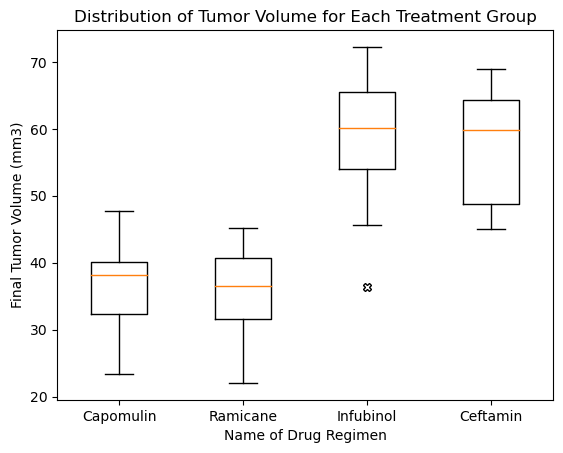

In [14]:
#Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#'sym' adds outliers as X symbols
plt.boxplot(tumor_vol_data, labels=treatment_list, sym='X')
#labels and title
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Name of Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
# Display the plot
plt.show()

## Line and Scatter Plots

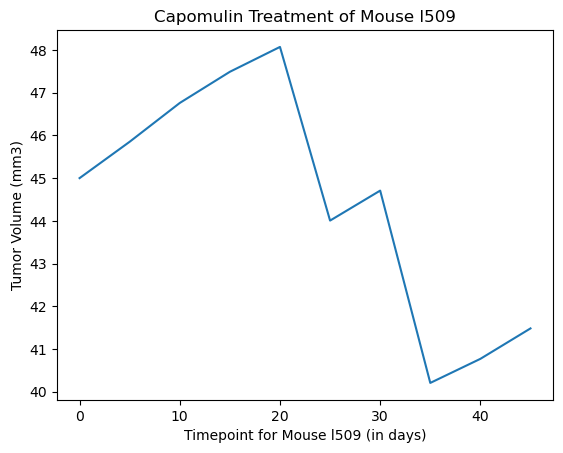

In [15]:
#Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#generate unique id for select mouse-1509
unique_mouse_id = 'l509'
#locate unique mouse data by id from previously calculated dataframe
unique_mouse_data = merged_meta_study_data[(merged_meta_study_data['Drug Regimen'] == 'Capomulin') & 
                                             (merged_meta_study_data['Mouse ID'] == unique_mouse_id)]
#generate line and scatter plot
plt.plot(unique_mouse_data['Timepoint'], unique_mouse_data['Tumor Volume (mm3)'])
#Set graph title and Axis titles
plt.title(f'Capomulin Treatment of Mouse {unique_mouse_id}')
plt.xlabel(f'Timepoint for Mouse {unique_mouse_id} (in days)')
plt.ylabel('Tumor Volume (mm3)')
#plot graph
plt.show()

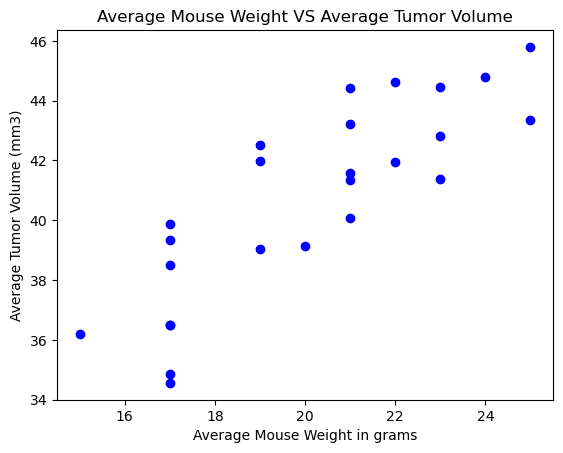

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#filter through data to retrieve data unique to Capomulin
capomulin_solo_data = merged_meta_study_data[merged_meta_study_data['Drug Regimen'] == 'Capomulin']
#create groupbys by mouse id to calculate the mean of mouse weight and the mean of observed tumor volumes 
average_tumor_volume = capomulin_solo_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_solo_data.groupby('Mouse ID')['Weight (g)'].mean()
#generate scatterplot
plt.scatter(mouse_weight, average_tumor_volume, marker='o', color='blue')
#title scatterplot and axis
plt.title('Average Mouse Weight VS Average Tumor Volume')
plt.xlabel('Average Mouse Weight in grams')
plt.ylabel('Average Tumor Volume (mm3)')
#display output
plt.show()

## Correlation and Regression

The Correlation between mouse weight and the average tumor volume is: 0.8419363424694721


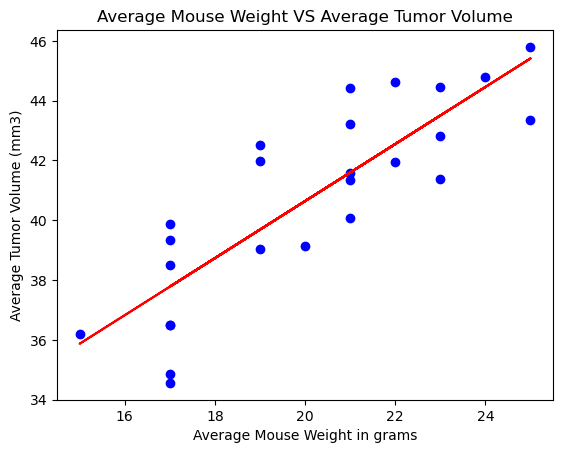

In [17]:
# Calculate the correlation coefficient and a linear regression model 
#for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#filter through data to retrieve data unique to Capomulin
capomulin_solo_data = merged_meta_study_data[merged_meta_study_data['Drug Regimen'] == 'Capomulin']
#create groupbys by mouse id to calculate the mean of mouse weight and the mean of observed tumor volumes 
average_tumor_volume = capomulin_solo_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_solo_data.groupby('Mouse ID')['Weight (g)'].mean()
#generate scatterplot
plt.scatter(mouse_weight, average_tumor_volume, marker='o', color='blue')
# Calculate, create, and plot the linear regression line of graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, average_tumor_volume)
regression_line = slope * mouse_weight + intercept
plt.plot(mouse_weight, regression_line, color='red')
#title scatterplot and axis
plt.title('Average Mouse Weight VS Average Tumor Volume')
plt.xlabel('Average Mouse Weight in grams')
plt.ylabel('Average Tumor Volume (mm3)')
#display output
print(f'The Correlation between mouse weight and the average tumor volume is: {rvalue}')
plt.show()